In [39]:
## Importing SOCAT synthesis data into a readable and usable format

# Libraries needed

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

pd.set_option('display.max_columns', None)

In [2]:
# Load observational data
# Skip first 1,919 rows due to data inconsistency issues

natl = pd.read_table('/home/fid000/WORK/ANALYSIS/DATA/SOCATv2021_NorthAtlantic.tsv',
                    sep = '\t',
                    skiprows = 1919)

# Rename columns since column headers get cut off

natl.columns = ['Expocode', 'Version', 'Source_DOI', 'QC_Flag', 'Year', 'Month', 'Day', 'Hour',
                'Minute', 'Seconds', 'Longitude', 'Latitude', 'Sample_Depth', 'Salinity', 'SST',
               'Tequ', 'PPPP', 'Pequ', 'WOA_SSS', 'NCEP_SLP', 'ETOPO2_Depth', 'Dist_to_land',
               'GVCO2', 'xCO2water_equ_dry', 'xCO2water_SST_dry', 'pCO2water_equ_wet', 'pCO2water_SST_wet',
               'fCO2water_equ_wet', 'fCO2water_SST_wet', 'fCO2rec', 'fCO2rec_src', 'fCO2rec_flag']

/home/fid000/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Converting columns year, month and day to a datetime object in a new column called 'Date'

natl['Date'] = pd.to_datetime(natl[['Year','Month','Day']])

In [56]:
natl.head()

,Expocode,Version,Source_DOI,QC_Flag,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Date
0,69920190509,2020.0N,NaN,C,2019,5,12,8,4,0.0,345.97812,48.83245,NaN,34.848,12.587,NaN,NaN,1017.709,35.612,1025.7,4520.0,438.0,416.258,NaN,NaN,NaN,336.898,NaN,338.742,335.637,4,2,2019-05-12
1,69920190509,2020.0N,NaN,C,2019,5,12,8,4,10.0,345.97723,48.83186,NaN,34.994,12.591,NaN,NaN,1017.839,35.612,1025.7,4521.0,438.0,416.258,NaN,NaN,NaN,337.790,NaN,339.640,336.526,4,2,2019-05-12
2,69920190509,2020.0N,NaN,C,2019,5,12,8,4,20.0,345.97639,48.83127,NaN,34.990,12.585,NaN,NaN,1017.839,35.612,1025.7,4523.0,438.0,416.258,NaN,NaN,NaN,338.341,NaN,340.194,337.075,4,2,2019-05-12
3,69920190509,2020.0N,NaN,C,2019,5,12,8,4,30.0,345.97548,48.83069,NaN,34.985,12.581,NaN,NaN,1017.839,35.612,1025.7,4524.0,438.0,416.258,NaN,NaN,NaN,338.501,NaN,340.355,337.234,4,2,2019-05-12
4,69920190509,2020.0N,NaN,C,2019,5,12,8,4,40.0,345.97458,48.83014,NaN,34.984,12.579,NaN,NaN,1017.839,35.612,1025.7,4525.0,438.0,416.258,NaN,NaN,NaN,338.376,NaN,340.229,337.109,4,2,2019-05-12


In [ ]:
sns.countplot(x='Longitude', data=natl)

<AxesSubplot:xlabel='Longitude', ylabel='count'>

In [ ]:
sns.distplot(x='Longitude', data=natl)

In [5]:
# Which year has the most data, how does 2020 compare to this year? Is this year 2020? 

year = natl.Year.value_counts().sort_index
print(year)

<bound method Series.sort_index of 2016    181578
2007    178937
2013    178121
2009    162102
2017    159558
2008    148955
2015    148612
2012    147859
2014    138305
2011    111044
2019    110348
2006    100969
2010     79630
2020     75115
2018     72297
1997     70282
2002     62897
1996     49397
2004     43069
2005     41752
2003     30158
2001     17482
1994     16698
1995     15215
1998     11965
1981      3653
1992      3253
1991      3044
1993      1532
1989       846
2000       385
1982       363
1990       254
1987       184
1999       182
1978        25
Name: Year, dtype: int64>


In [6]:
# Looking at 2007 from here on in the notebook 
# because it has the most data
# Can edit this to look at different years

natl2007 = natl[(natl["Year"] == 2007)]
natl2007.head()

natl2011 = natl[(natl["Year"] == 2011)]

In [7]:
min(natl2011.Longitude)

0.002

In [8]:
# Group by 'date' variable

grouped2007 = natl2007.groupby('Date')
day2007 = grouped2007.aggregate(np.mean)
day2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356 entries, 2007-01-01 to 2007-12-31
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               356 non-null    float64
 1   Month              356 non-null    float64
 2   Day                356 non-null    float64
 3   Hour               356 non-null    float64
 4   Minute             356 non-null    float64
 5   Seconds            356 non-null    float64
 6   Longitude          356 non-null    float64
 7   Latitude           356 non-null    float64
 8   Sample_Depth       344 non-null    float64
 9   Salinity           355 non-null    float64
 10  SST                356 non-null    float64
 11  Tequ               356 non-null    float64
 12  PPPP               341 non-null    float64
 13  Pequ               356 non-null    float64
 14  WOA_SSS            356 non-null    float64
 15  NCEP_SLP           356 non-null    float64
 16  ETOPO2_

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

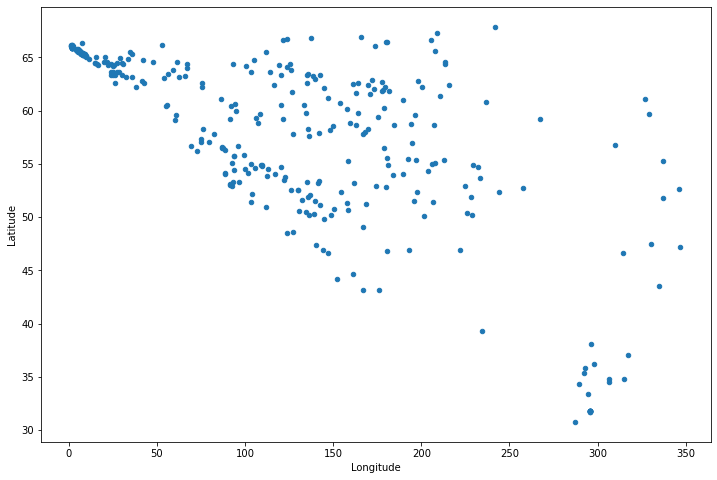

In [54]:
# Plot of long/lat to see general geographic distribution of data

day2007.plot.scatter('Longitude', 'Latitude')

<AxesSubplot:xlabel='SST', ylabel='Salinity'>

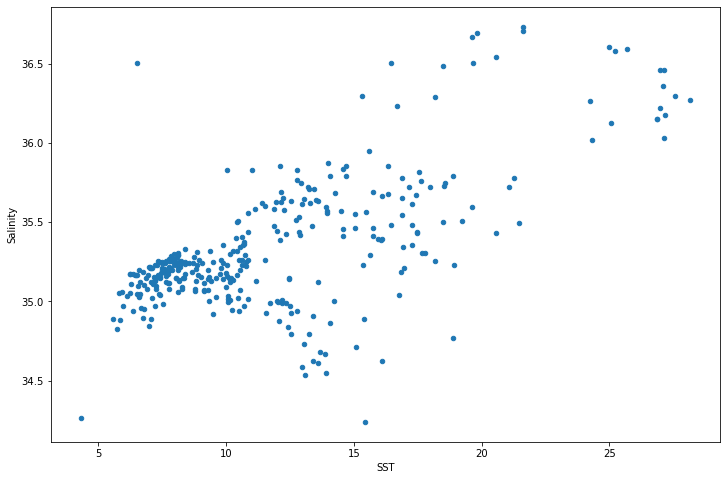

In [10]:
# Testing plots

day2007.plot.scatter('SST', 'Salinity')

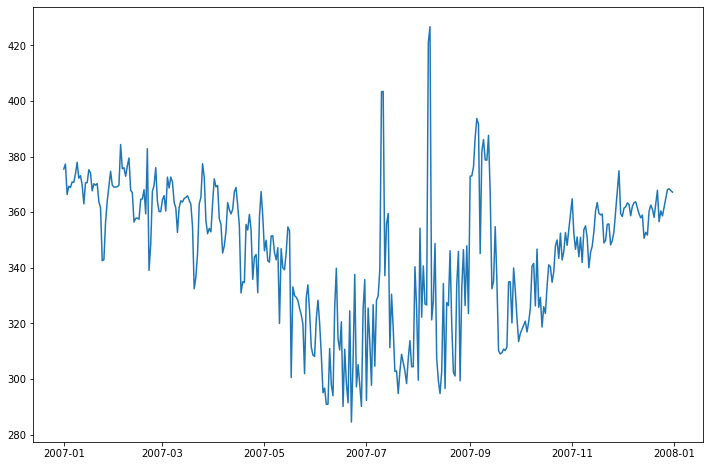

In [11]:
# Testing plots

plt.plot(day2007["fCO2rec"])

/home/fid000/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='fCO2rec'>

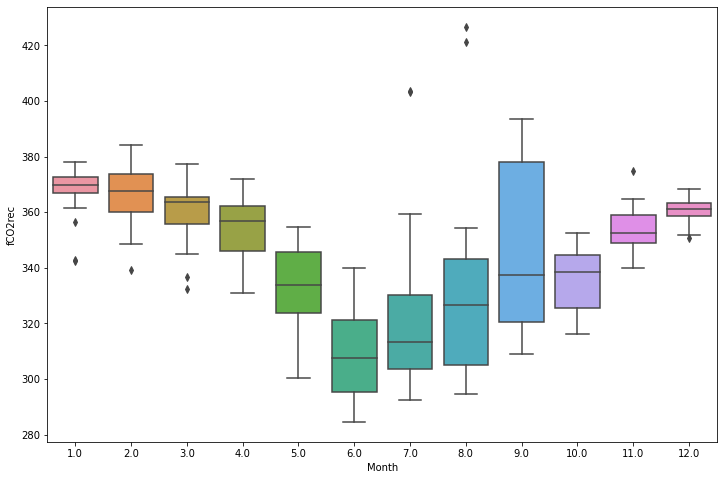

In [12]:
# Testing plots

sns.boxplot(day2007['Month'],
            day2007['fCO2rec'])

In [13]:
day2007['Longitude1'] = (day2007['Longitude'] + 180) % 360 - 180
day2007.tail()

,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Longitude1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-12-25,2007.0,12.0,25.0,5.670213,28.191489,28.750000,2.002176,66.002112,3.0,35.036101,6.598745,6.987128,1003.531037,1003.144840,35.187005,1004.897872,2077.601064,405.398936,389.071016,373.401101,NaN,NaN,NaN,364.606457,358.665324,358.665452,1.0,2.0,2.002176
2007-12-28,2007.0,12.0,28.0,22.478261,27.826087,32.826087,1.864348,65.895435,3.0,35.197826,7.686391,8.222174,988.516957,989.509565,35.148000,991.600000,2308.130435,402.782609,389.583957,391.346696,NaN,NaN,NaN,376.599652,368.160957,368.161087,1.0,2.0,1.864348
2007-12-29,2007.0,12.0,29.0,10.228477,29.437086,28.609272,2.152063,65.909570,3.0,35.204500,7.581715,8.083377,990.010728,989.393278,35.140162,993.628808,1904.579470,394.086093,389.584219,391.038434,NaN,NaN,NaN,376.292315,368.391325,368.391599,1.0,2.0,2.152063
2007-12-30,2007.0,12.0,30.0,12.507463,30.426866,29.173134,1.973176,66.062221,3.0,35.177570,7.460615,7.972388,1014.909866,1013.907522,35.182749,1018.060597,2232.922388,410.498507,389.587322,381.060782,NaN,NaN,NaN,375.847979,367.798504,367.798666,1.0,2.0,1.973176
2007-12-31,2007.0,12.0,31.0,11.085227,29.235795,29.332386,1.899261,66.135875,3.0,35.161472,7.327420,7.840284,1020.279574,1019.682869,35.199273,1022.865625,2424.474432,417.920455,389.588858,378.239108,NaN,NaN,NaN,375.256801,367.204330,367.204554,1.0,2.0,1.899261


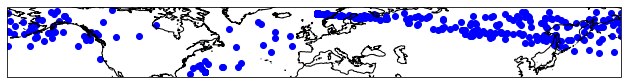

In [40]:
figure = plt.figure(figsize = (11, 8.5))
mapo='viridis'
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
lon = day2007['Longitude1']
lat = day2007['Latitude']
co2 = day2007['fCO2rec']
plt.scatter(lon, lat,
        color='blue', marker='o',
        transform=ccrs.PlateCarree(),
        )

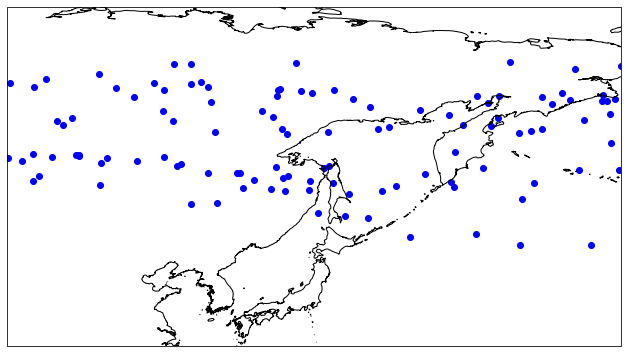

In [38]:
figure = plt.figure(figsize = (11, 8.5))
mapo='viridis'
ax = plt.subplot(1,1,1,projection = ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([100, 180, 30, 70])
#lon = day2007['Longitude1']
#lat = day2007['Latitude']
#co2 = day2007['fCO2rec']
plt.scatter(x=lon, y=lat,
        color='blue', marker='o',
        transform=ccrs.PlateCarree(),
        )

In [34]:
max(day2007.Latitude)

67.88740733197555

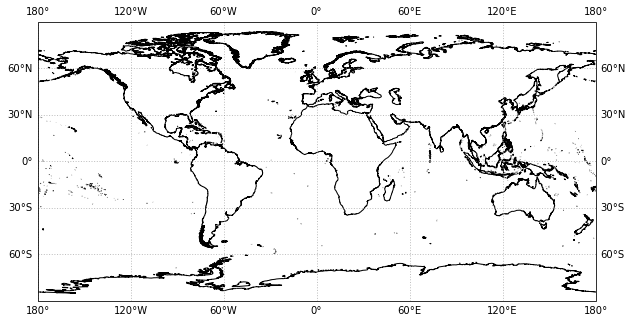

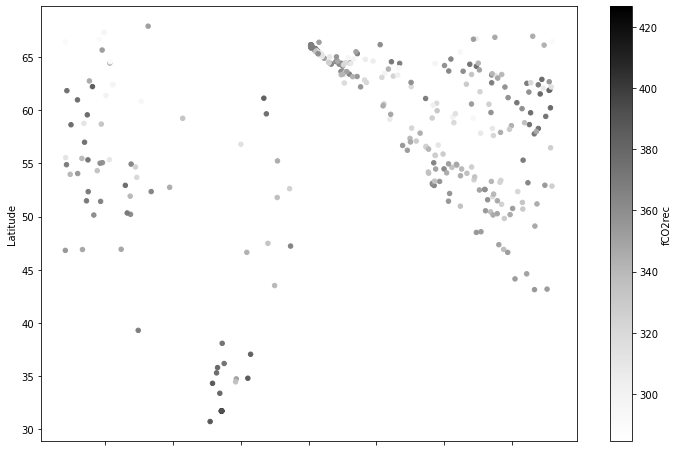

In [14]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax.coastlines(resolution = '10m')
#ax.set_extent([0, 180, 30, 58])
ax.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = ':')
day2007.plot.scatter(x='Longitude1',y= 'Latitude',c='fCO2rec', marker='o')
plt.show()

In [41]:
data = day2007.to_xarray()

In [43]:
lon = day2007['Longitude1'][:]
lat = day2007['Latitude'][:]
co2 = day2007['fCO2rec'][:]

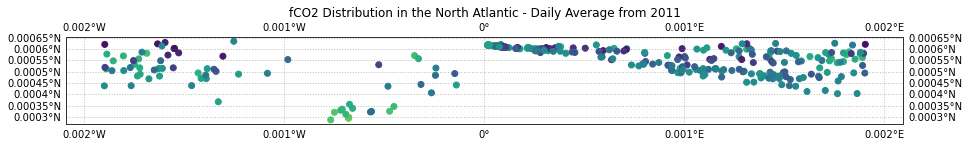

In [52]:
figure = plt.figure(figsize = (15, 15))
mapo='viridis'
ax = plt.subplot(1,1,1,projection = ccrs.Robinson(central_longitude=0))
ax.coastlines(resolution = '10m')
#ax.set_extent([lon-10,lon+10,lat-10,lat+10],ccrs.PlateCarree())
#ax.set_extent([-120, 40, 0, 80])
ax.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = ':')
data.plot.scatter(x='Longitude1',y='Latitude',c=co2,marker='o', cmap=mapo,
                 transform=ccrs.Robinson())
#ax.plot.colorbar(co2, orientation = 'vertical', label = 'fCO2')
ax.set_title('fCO2 Distribution in the North Atlantic - Daily Average from 2011')
plt.show()